In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from facemesh import *
from draw_utils import *
from mesh_connection import FACE_CONNECTIONS
import matplotlib.pylab as plt
import cv2
import numpy

In [3]:
MESH_MODEL_PATH = "models/cocompile/face_landmark_192_full_integer_quant_edgetpu.tflite"
face_mesher = FaceMesher(MESH_MODEL_PATH)

In [4]:
face = cv2.imread('face.png')
face_input = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
#%timeit landmarks, scores = face_mesher.inference(face_input)
landmarks, scores = face_mesher.inference(face_input)

(468, 3)


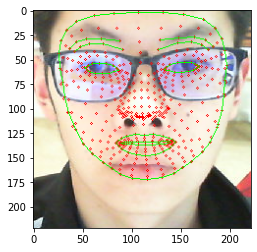

In [6]:
face_output = draw_mesh(face_input, landmarks, contour=True)
plt.imshow(face_output)

In [21]:
FACE_DETECT_MODEL = "./models/cocompile/face_detection_front_128_full_integer_quant_edgetpu.tflite"
face_detector = FaceDetector(model_path=FACE_DETECT_MODEL)

(896, 2)


In [22]:
image = cv2.imread('detect.jpg')
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# %timeit bboxes_decoded, landmarks, scores = face_detector.inference(image)
bboxes_decoded, landmarks, scores = face_detector.inference(image)

[autoreload of facemesh failed: Traceback (most recent call last):
  File "/home/yzy/anaconda3/envs/nanodet/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/yzy/anaconda3/envs/nanodet/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/yzy/anaconda3/envs/nanodet/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/yzy/anaconda3/envs/nanodet/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_re

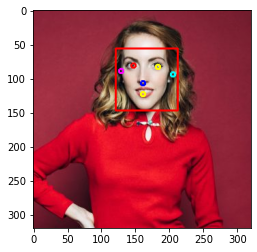

In [26]:
image_show = image.copy()
image_show = draw_face(image_show, bboxes_decoded, landmarks, scores)
plt.imshow(image_show)